In [77]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns

from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline
plt.style.use('seaborn-white')

boston = load_boston()
dir(boston)

['DESCR', 'data', 'feature_names', 'filename', 'target']

In [78]:
boston.target


array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [79]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [80]:
boston_data = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


(0, 20)

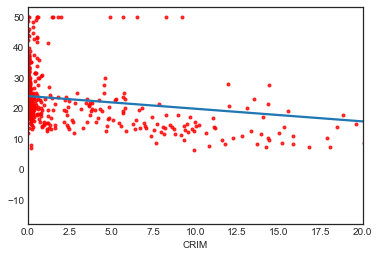

In [81]:
sns.regplot(boston_data.CRIM, boston.target, order=1, ci=None, scatter_kws={'color':'r', 's':9})
plt.xlim(0,20)


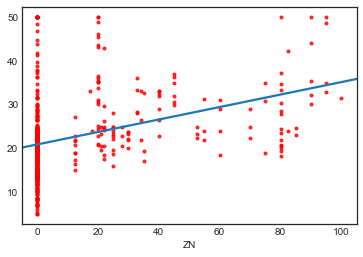

In [82]:
sns.regplot(boston_data.ZN , boston.target, order=1, ci=None, scatter_kws={'color':'r', 's':9})



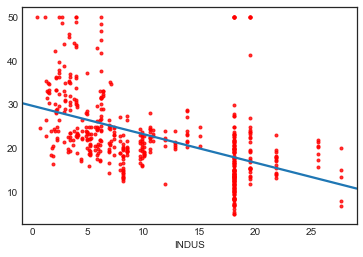

In [83]:
sns.regplot(boston_data.INDUS , boston.target, order=1, ci=None, scatter_kws={'color':'r', 's':9})


3.6.2 Simple linear regression

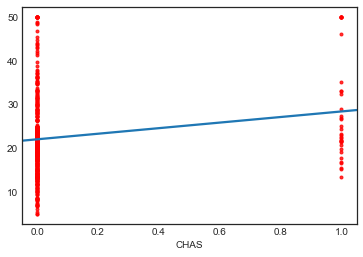

In [84]:
sns.regplot(boston_data.CHAS, boston.target, order=1, ci=None, scatter_kws={'color':'r', 's':9})


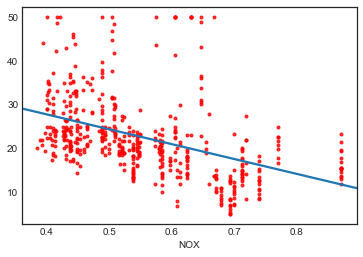

In [85]:
sns.regplot(boston_data.NOX , boston.target, order=1, ci=None, scatter_kws={'color':'r', 's':9})

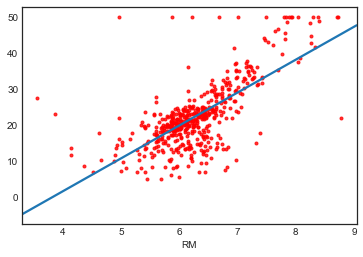

In [86]:
sns.regplot(boston_data.RM , boston.target, order=1, ci=None, scatter_kws={'color':'r', 's':9})

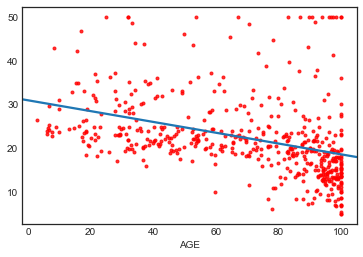

In [87]:
sns.regplot(boston_data.AGE, boston.target, order=1, ci=None, scatter_kws={'color':'r', 's':9})

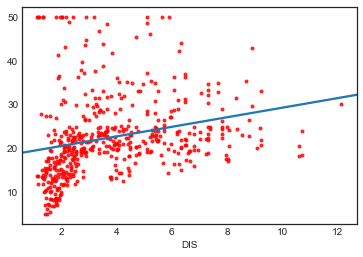

In [88]:
sns.regplot(boston_data.DIS, boston.target, order=1, ci=None, scatter_kws={'color':'r', 's':9})

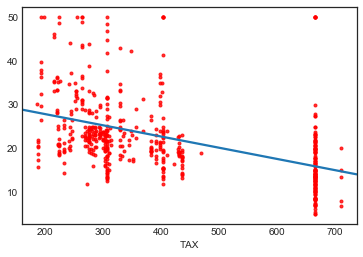

In [89]:
sns.regplot(boston_data.TAX, boston.target, order=1, ci=None, scatter_kws={'color':'r', 's':9})

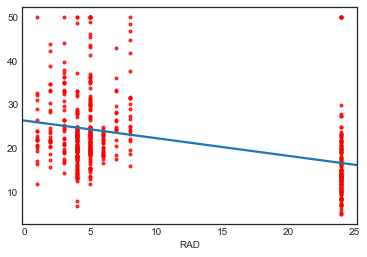

In [90]:
sns.regplot(boston_data.RAD , boston.target, order=1, ci=None, scatter_kws={'color':'r', 's':9})

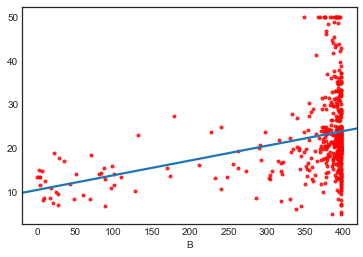

In [91]:
sns.regplot(boston_data.B, boston.target, order=1, ci=None, scatter_kws={'color':'r', 's':9})

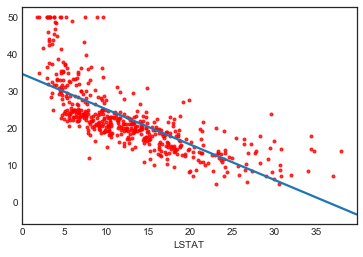

In [92]:
sns.regplot(boston_data.LSTAT , boston.target, order=1, ci=None, scatter_kws={'color':'r', 's':9})

In [93]:
#fitting simple model
s=skl_lm.LinearRegression()
x=scale(boston_data.LSTAT, with_mean=True, with_std=False ).reshape(-1,1)
y=boston.target
s.fit(boston_data[["LSTAT"]],boston.target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [94]:
print(s.coef_)
print(s.intercept_)

[-0.95004935]
34.55384087938309


In [95]:
#generating summary of the model
X2 = sm.add_constant(boston_data.LSTAT)
est = sm.OLS(boston.target, X2)
t2 = est.fit()
print(t2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Fri, 01 Mar 2019   Prob (F-statistic):           5.08e-88
Time:                        13:34:02   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.5538      0.563     61.415      0.0

In [96]:
#taking evenly spaced numbers in ranges of intercept and coef
B0 = np.linspace(s.intercept_-2, s.intercept_+2,50) 
B1 = np.linspace(s.coef_-0.02, s.coef_+0.02, 50)

#making matrixes 
xx, yy = np.meshgrid(B0, B1, indexing='xy')

Z = np.zeros((B0.size,B1.size))

#Calculate Z-values (RSS) based on grid of coefficients
for (i,j),v in np.ndenumerate(Z): 
    Z[i,j] =((y - (xx[i,j]+x.ravel()*yy[i,j]))*2).sum()/1000

#Minimized RSS
min_RSS = r' 𝛽0 ,  𝛽1  for minimized RSS' 
min_rss = np.sum((s.intercept_+s.coef_*x - y.reshape(-1,1))*2)/1000
min_rss


12.165286969935687

In [97]:
#MULIT lINEAR REGRESSION
ml=skl_lm.LinearRegression()
ml.fit(boston_data,boston.target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [98]:
print(ml.coef_)
print(ml.intercept_)

[-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01]
36.459488385089855


In [99]:
#generating summary of the model
X2 = sm.add_constant(boston_data)
est = sm.OLS(boston.target, X2)
t2 = est.fit()
print(t2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Fri, 01 Mar 2019   Prob (F-statistic):          6.72e-135
Time:                        13:34:02   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.0

In [100]:
boston_data.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


In [101]:
boston_data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


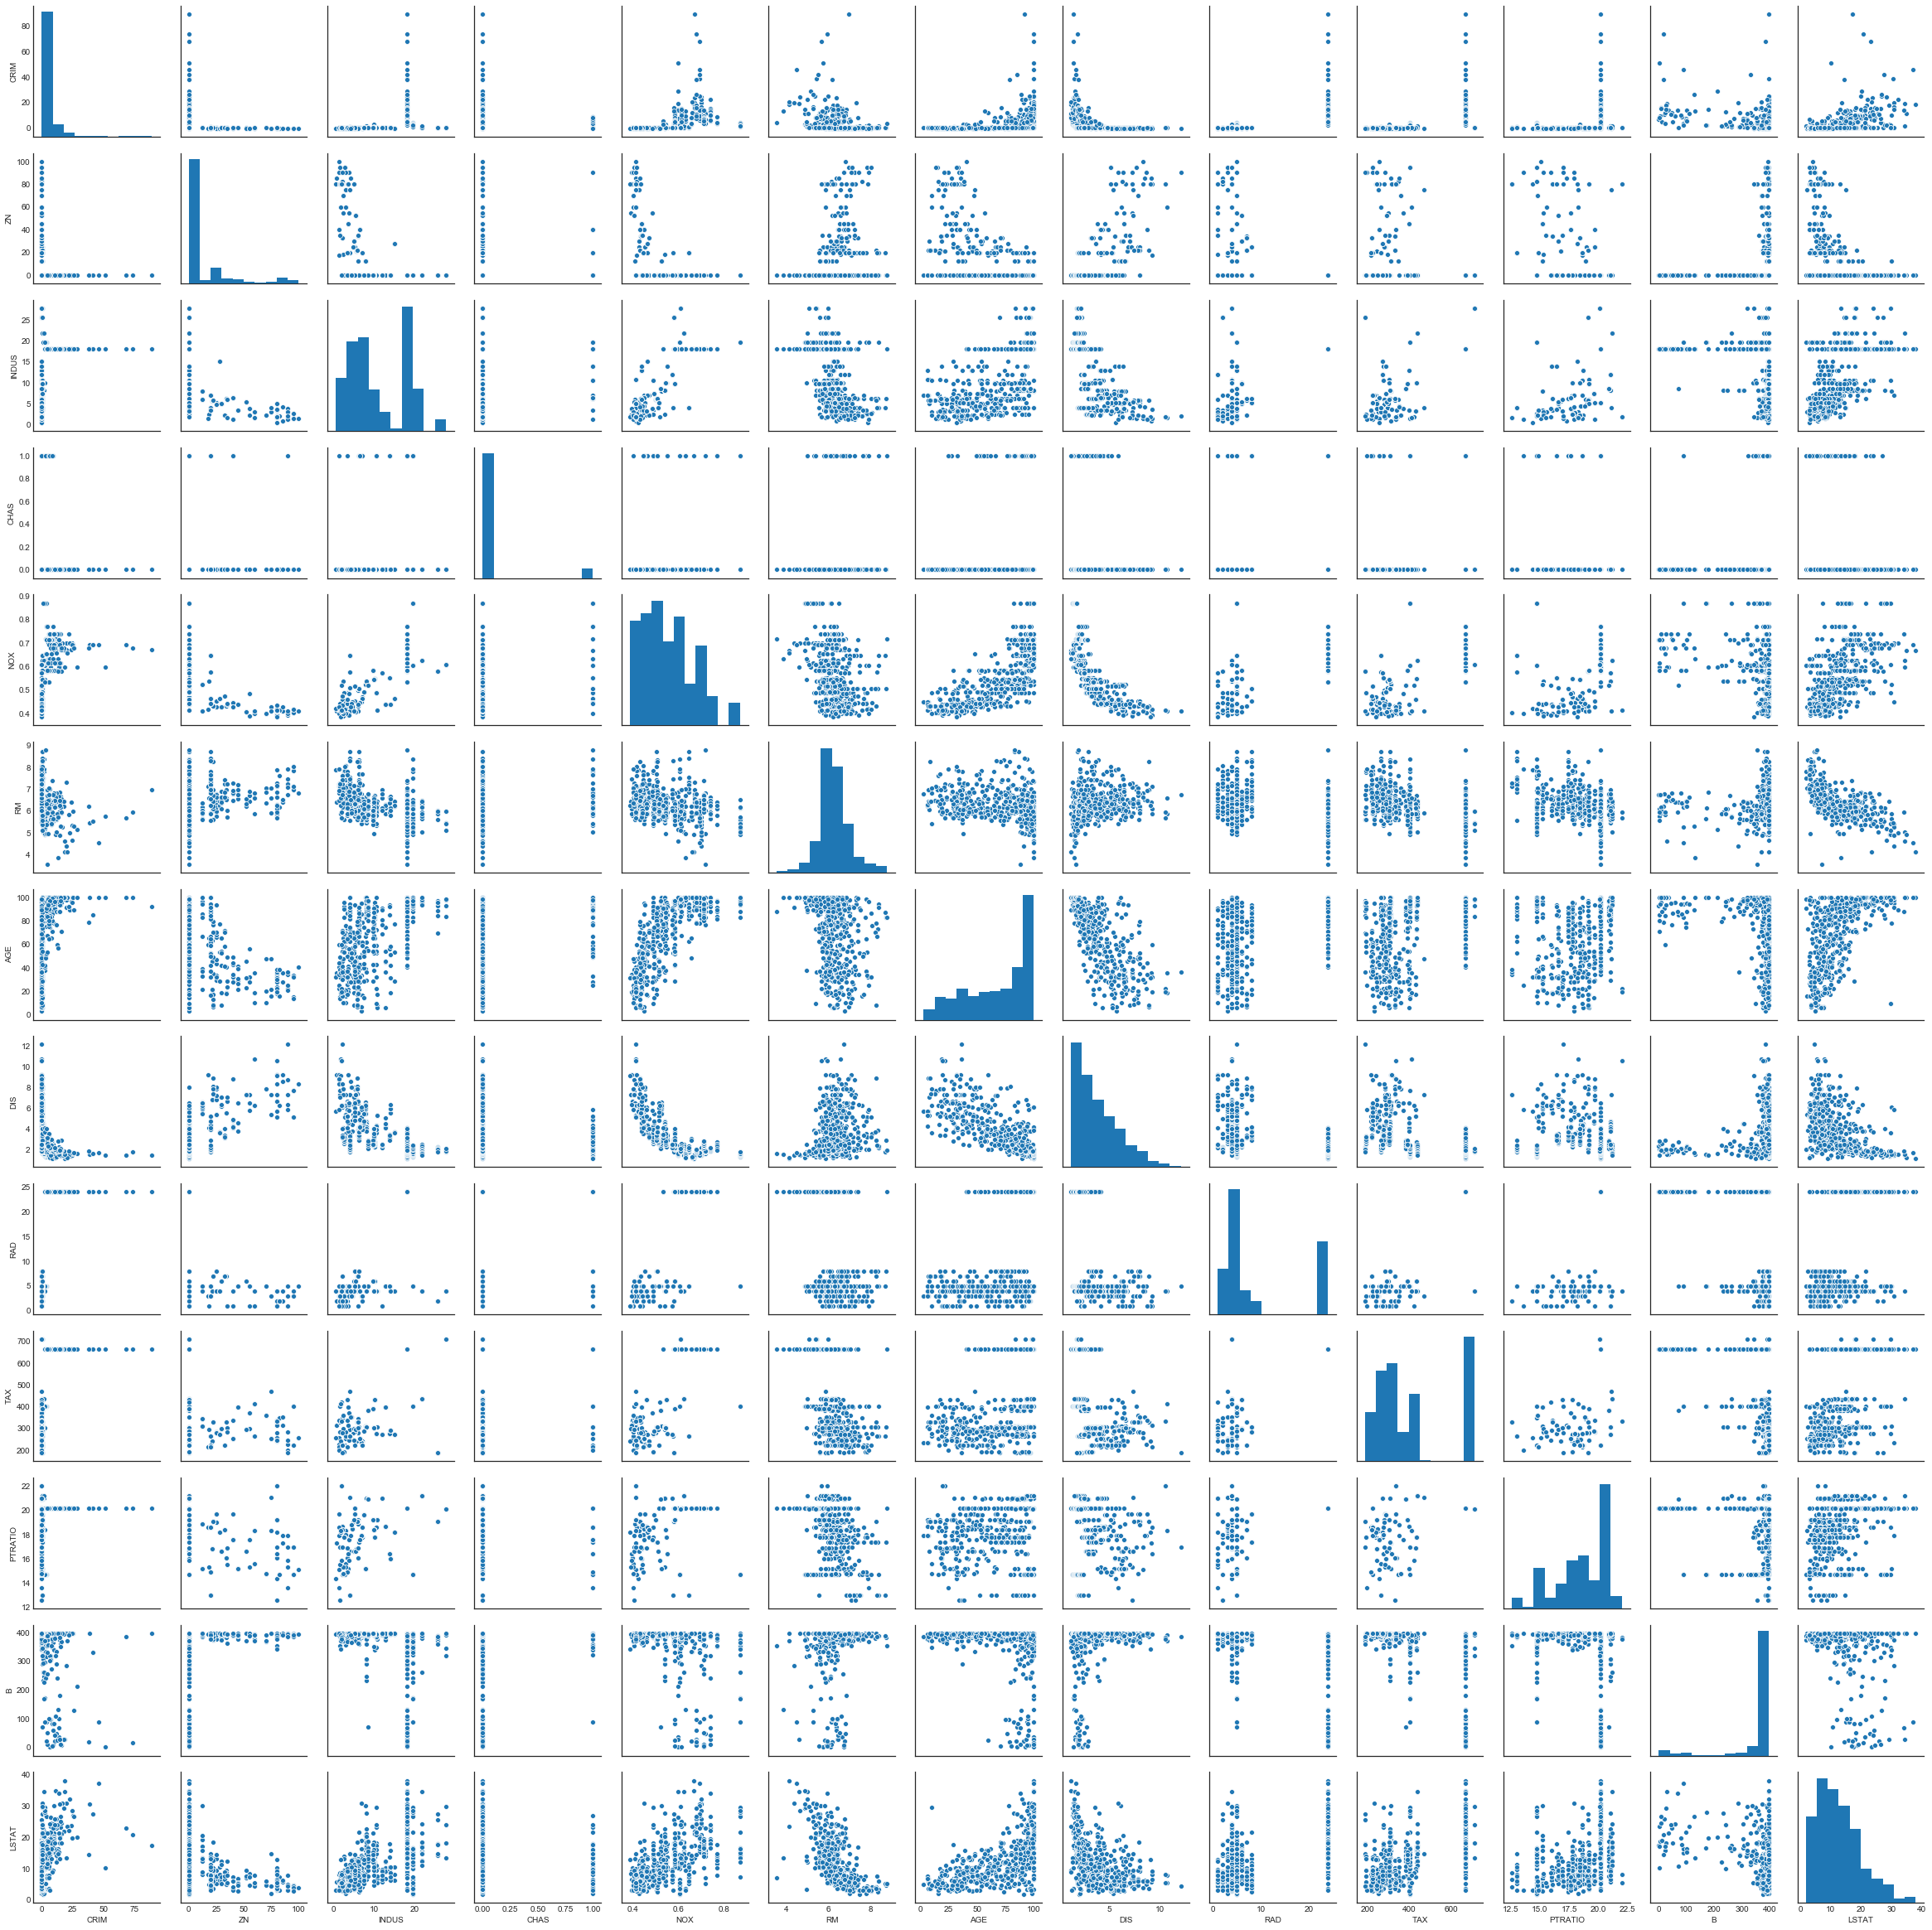

In [102]:
sns.pairplot(boston_data)

In [127]:
#interaction terms
#fitting simple model
it=skl_lm.LinearRegression()
o=boston_data[["LSTAT","RM"]]

it.fit(o,boston_data.LSTAT*boston_data.RM,boston.target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [128]:
print(s.coef_)
print(s.intercept_)



[5.86235438 6.83328345]
-40.90117041488777


In [129]:
o=boston_data.LSTAT*boston_data.RM
X2 = sm.add_constant(o)

est = sm.OLS(boston.target,X2 )
t2 = est.fit()
print(t2.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.532
Model:                            OLS   Adj. R-squared:                  0.531
Method:                 Least Squares   F-statistic:                     573.4
Date:                Fri, 01 Mar 2019   Prob (F-statistic):           3.47e-85
Time:                        16:19:07   Log-Likelihood:                -1648.0
No. Observations:                 506   AIC:                             3300.
Df Residuals:                     504   BIC:                             3309.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         35.8503      0.623     57.579      0.0

VARIANCE INFLAMATION FACTOR

In [154]:
t=boston_data[["RM","AGE"]]
x3=sm.add_constant(t)
est=sm.OLS(boston_data.LSTAT,x3)
t1=est.fit()
d=t1.rsquared

In [155]:
print(1*(1-d))

0.40366458541752626
